In [12]:
import pandas as pd
import numpy as np

bdf = pd.read_csv('input_files/duf4176_bacteria_uniprot.csv')
bdf = bdf.rename(columns={'Entry': 'accession'})

cdf = pd.read_csv('input_files/gnn_neighb_acc_data.csv')
cdf = cdf.rename(columns={'attributes_accession': 'accession'})
# Just the DUF4176 with no neighbors
atrib_df = cdf[['accession', 'attributes_start', 'attributes_stop', 'seq_len', 'cluster_num', 'organism', 'a_direction', 'a_family']]
atrib_df = atrib_df.drop_duplicates()

udf = pd.merge(atrib_df, bdf, on='accession', how='left')


,accession,attributes_start,attributes_stop,seq_len,cluster_num,organism,a_direction,a_family,Reviewed,Entry Name,...,Fragment,Caution,kingdom,clade,phylum,class,order,family,genus,species
0,A0A060RLE7,20161,20823,219,1,Streptococcus gallolyticus.,normal,IPR025233,unreviewed,A0A060RLE7_9STRE,...,NaN,CAUTION: The sequence shown here is derived fr...,Bacteria,Terrabacteria group,Bacillota,Bacilli,Lactobacillales,Streptococcaceae,Streptococcus,NaN
1,A0A069CRX2,236912,237631,238,1,Weissella oryzae (strain DSM 25784 / JCM 18191...,complement,IPR025233,unreviewed,A0A069CRX2_WEIOS,...,NaN,NaN,Bacteria,Terrabacteria group,Bacillota,Bacilli,Lactobacillales,Lactobacillaceae,Weissella,Weissella oryzae
2,A0A091BL67,3636,4331,230,1,Streptococcus equinus JB1.,complement,IPR025233,unreviewed,A0A091BL67_STREI,...,NaN,CAUTION: The sequence shown here is derived fr...,Bacteria,Terrabacteria group,Bacillota,Bacilli,Lactobacillales,Streptococcaceae,Streptococcus,Streptococcus equinus
3,A0A091BSH7,16075,16737,219,1,Streptococcus equinus JB1.,normal,IPR025233,unreviewed,A0A091BSH7_STREI,...,NaN,CAUTION: The sequence shown here is derived fr...,Bacteria,Terrabacteria group,Bacillota,Bacilli,Lactobacillales,Streptococcaceae,Streptococcus,Streptococcus equinus
4,A0A0J6L9E3,56353,57069,237,1,Bacillus sp. LK2.,complement,IPR025233,unreviewed,A0A0J6L9E3_9BACI,...,NaN,CAUTION: The sequence shown here is derived fr...,Bacteria,Terrabacteria group,Bacillota,Bacilli,Bacillales,Bacillaceae,Bacillus,unclassified Bacillus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,R5XWK9,9746,10030,93,243,Ruminococcus sp. CAG:488.,complement,IPR025233,unreviewed,R5XWK9_9FIRM,...,NaN,CAUTION: The sequence shown here is derived fr...,Bacteria,Terrabacteria group,Bacillota,Clostridia,Eubacteriales,Oscillospiraceae,Ruminococcus,environmental samples
1901,R6Z6Q9,2513,2833,105,244,Collinsella sp. CAG:398.,normal,IPR025233,unreviewed,R6Z6Q9_9ACTN,...,NaN,CAUTION: The sequence shown here is derived fr...,Bacteria,Terrabacteria group,Actinomycetota,Coriobacteriia,Coriobacteriales,Coriobacteriaceae,Collinsella,environmental samples
1902,R7AFY8,23230,23517,94,245,Clostridium sp. CAG:43.,normal,IPR025233,unreviewed,R7AFY8_9CLOT,...,NaN,CAUTION: The sequence shown here is derived fr...,Bacteria,Terrabacteria group,Bacillota,Clostridia,Eubacteriales,Clostridiaceae,Clostridium,environmental samples
1903,R7B5B6,22897,23229,109,246,Clostridium sp. CAG:43.,normal,IPR025233,unreviewed,R7B5B6_9CLOT,...,NaN,CAUTION: The sequence shown here is derived fr...,Bacteria,Terrabacteria group,Bacillota,Clostridia,Eubacteriales,Clostridiaceae,Clostridium,environmental samples


# Create Length histograms for each cluster

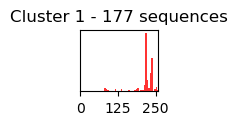

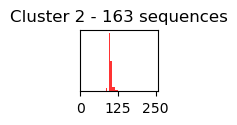

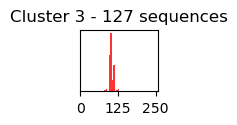

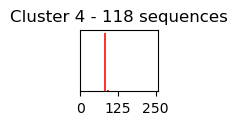

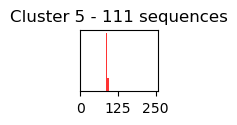

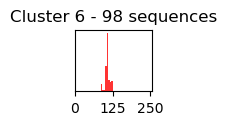

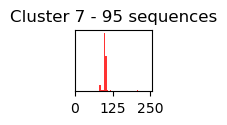

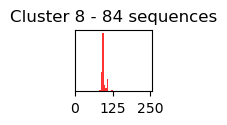

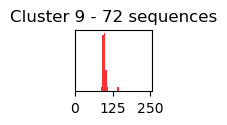

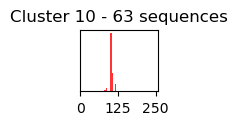

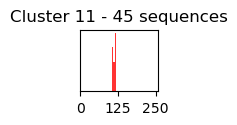

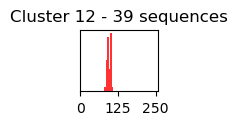

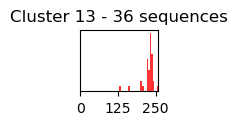

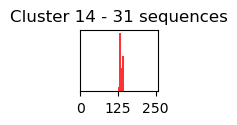

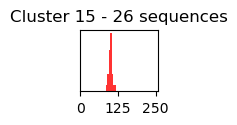

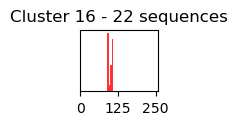

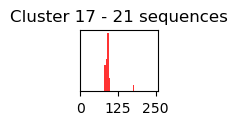

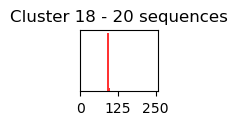

In [30]:
import matplotlib.pyplot as plt
# group the data by cluster_num and count the number of members in each group
group_counts = udf.groupby('cluster_num').size()

# get the cluster numbers with more than 5 members
large_clusters = group_counts[group_counts > 19].index.tolist()

# create a subset of udf that only contains rows from large clusters
large_cluster_df = udf.groupby('cluster_num').filter(lambda x: x.name in large_clusters)


# calculate the bin edges based on the maximum and minimum values of the data and the desired bin width
bin_width = 5
min_seq_len = large_cluster_df['Length'].min()
max_seq_len = large_cluster_df['Length'].max()
bins = np.arange(min_seq_len, max_seq_len + bin_width, bin_width)

# group the data by cluster_num
groups = large_cluster_df.groupby('cluster_num')

# plot a histogram for each group
for name, group in groups:
    fig, ax = plt.subplots(figsize=(1, 0.8))
    group.hist(column='Length', bins=bins, color='red', alpha=0.8, ax=ax)
    
    ax.set_title(f'Cluster {name} - {len(group)} sequences')
    # ax.set_xlabel('Sequence Length')
    # ax.set_ylabel('Relative\n Frequency')
    ax.set_xlim(0, max_seq_len)
    ax.set_xticks([0, 125, 250])
    ax.set_yticks([])
    # ax.set_yticks(np.linspace(0, round(ax.get_ylim()[1]), 3))
    ax.grid(False)  # turn off the grid lines
    plt.savefig(f'plots_histograms/frequency_cluster_{name}.svg')

# Create Family pie charts

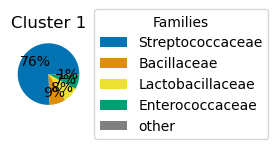

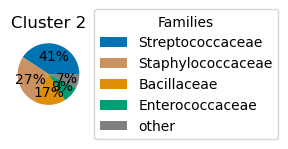

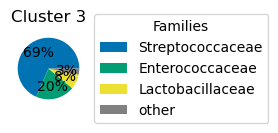

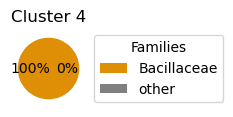

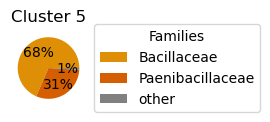

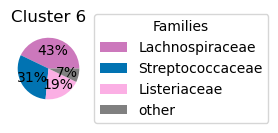

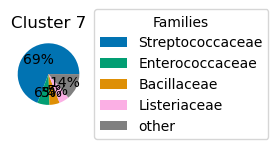

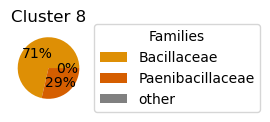

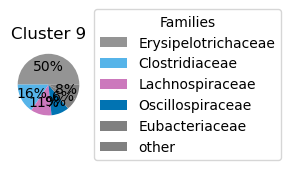

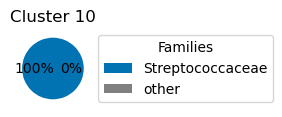

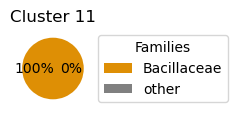

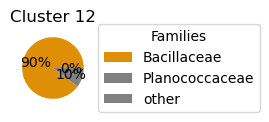

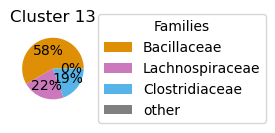

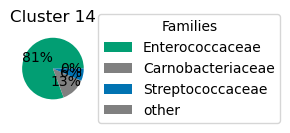

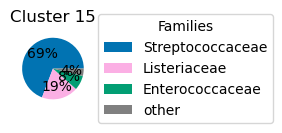

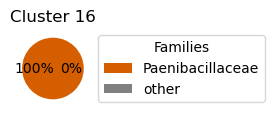

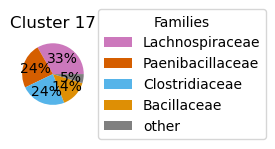

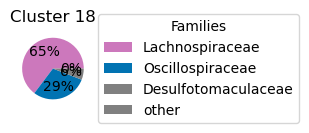

In [19]:
import seaborn as sns

# create a color palette based on the "family" column
# get a list of unique values in the "family" column
# unique_families = large_cluster_df['family'].unique()

family_counts = large_cluster_df['family'].value_counts()
    
# combine categories with an occurrence below 1.5% into a new category called "other"
other_count = family_counts[family_counts < 0.01 * family_counts.sum()].sum()
family_counts = family_counts[family_counts >= 0.01 * family_counts.sum()]
family_counts['other'] = other_count
# create a pie chart for the current cluster using the colors from the "family_colors" dictionary

# create a list of colors based on the "colorblind" color palette
palette_list = sns.color_palette('colorblind', n_colors=len(family_counts.index), as_cmap=True)
palette_list = palette_list * (len(family_counts.index) // len(palette_list) + 1)

# create a dictionary that maps each unique family to a specific color in the "husl" color palette
family_colors = {family: palette_list[i] for i, family in enumerate(family_counts.index)}
family_colors['other'] = 'gray'


# colors = [family_colors[family] for family in family_counts.index]

# loop over each cluster and create a pie chart for the values of "family"
for i, cluster_num in enumerate(large_cluster_df['cluster_num'].unique()):
    # create a new dataframe that counts the number of occurrences of each family in the current cluster
    cluster_df = large_cluster_df[large_cluster_df['cluster_num'] == cluster_num]
    family_data = cluster_df['family'].value_counts()
    # Group families with less than 5% occurrence into 'other'
    other_count = family_data[family_data < 0.05 * family_data.sum()].sum()
    family_data = family_data[family_data >= 0.05 * family_data.sum()]
    family_data['other'] = other_count
    
    
    # generate a list of colors for families in the current cluster
    colors = [family_colors.get(family, 'gray') for family in family_data.index]

    # create a new figure and axis object for the current cluster
    fig, ax = plt.subplots(figsize=(1, 1))
    
    wedges, labels, _ = ax.pie(family_data, colors=colors, autopct='%1.0f%%')

    # add a legend to the pie chart
    ax.legend(wedges, family_data.index, title='Families', loc='center left', bbox_to_anchor=(1, 0.5))

    # set the label font size to 8 points
    plt.setp(labels, fontsize=8)
    
    
    ax.set_title(f'Cluster {cluster_num}')
    plt.savefig(f'plots_pie/family_cluster_{cluster_num}.svg')


In [77]:
c1_df = udf[udf['cluster_num'] == 1]
c1_df = c1_df[c1_df['seq_len'] > 200]
c1_df = c1_df[c1_df['seq_len'] < 300]

# write out fasta files 
with open('fastas/DUF4176_Cluster1.fasta', 'w') as f:
    for i, row in c1_df.iterrows():
        # cluster_num = row['cluster_num']
        accession = row['accession']
        sequence = row['Sequence']
        line = f'>{accession}\n{sequence}\n'
        f.write(line)

In [81]:
c2_df = udf[udf['cluster_num'] == 2]
# write out fasta files 
with open('fastas/DUF4176_Cluster2.fasta', 'w') as f:
    for i, row in c2_df.iterrows():
        # cluster_num = row['cluster_num']
        accession = row['accession']
        sequence = row['Sequence']
        line = f'>{accession}\n{sequence}\n'
        f.write(line)

# Manually add SIR_0168 fasta sequence 

In [82]:
import subprocess

def run_muscle(input_file, output_file):
    muscle_command = ['muscle', '-in', input_file, '-out', output_file]
    subprocess.run(muscle_command, check=True)
    return
run_muscle('fastas/DUF4176_Cluster1_0168.fasta', 'fastas/DUF4176_Cluster1_aln.fasta')
run_muscle('fastas/DUF4176_Cluster2_GC1825.fasta', 'fastas/DUF4176_Cluster2_aln.fasta')



MUSCLE v3.8.31 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

DUF4176_Cluster1_0168 156 seqs, max length 256, avg  length 224
00:00:00      1 MB(0%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00      1 MB(0%)  Iter   1  100.00%  K-mer dist pass 2
00:00:00     24 MB(0%)  Iter   1  100.00%  Align node       
00:00:00     24 MB(0%)  Iter   1  100.00%  Root alignment
00:00:01     24 MB(0%)  Iter   2  100.00%  Refine tree   
00:00:01     24 MB(0%)  Iter   2  100.00%  Root alignment
00:00:01     24 MB(0%)  Iter   2  100.00%  Root alignment
00:00:02     24 MB(0%)  Iter   3  100.00%  Refine biparts
00:00:04     24 MB(0%)  Iter   4  100.00%  Refine biparts
00:00:04     24 MB(0%)  Iter   5  100.00%  Refine biparts
00:00:04     24 MB(0%)  Iter   5  100.00%  Refine biparts

MUSCLE v3.8.31 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Pleas